In [1]:
from datetime import datetime 
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np

# 1. Tải dữ liệu pulls từ file json

In [2]:
with open('pulls.json', 'r') as file:
    pulls = json.load(file)

# 2. Tạo DataFrame cho pulls với các trường dữ liệu cần thiết

In [3]:
processed_pulls = []
for pull in pulls:
    important_data = {
        'number': pull['number'],
        'state': pull['state'],
        'title': pull['title'],
        'author': pull['user']['login'],
        'created_at': pull['created_at'],
        'closed_at': pull['closed_at'],
        'merged_at': pull['merged_at'],
        'labels': [label['name'] for label in pull['labels']],
        'draft': pull['draft'],
        'merged': pull['merged_at'] != None
    }
    processed_pulls.append(important_data)

pulls_frame = pd.DataFrame(processed_pulls)
pulls_frame

,number,state,title,author,created_at,closed_at,merged_at,labels,draft,merged
0,92645,open,Fix `NOTIFICATION_SORT_CHILDREN` is called twi...,WhalesState,2024-06-01T13:20:24Z,None,None,[],False,False
1,92642,open,Add pitch and volume to audio in animations,killzebug,2024-06-01T12:00:03Z,None,None,"[bug, topic:audio, topic:animation]",False,False
2,92640,open,[Scene] Add `SceneStringNames::text/value_chan...,AThousandShips,2024-06-01T10:30:57Z,None,None,"[enhancement, topic:core]",False,False
3,92639,open,[Scene] Add `SceneStringNames::confirmed`,AThousandShips,2024-06-01T10:29:48Z,None,None,"[enhancement, topic:core]",False,False
4,92638,open,[Scene] Add `SceneStringNames::item_selected`,AThousandShips,2024-06-01T10:28:31Z,None,None,"[enhancement, topic:core]",False,False
...,...,...,...,...,...,...,...,...,...,...
41465,23,closed,Fixed typo in undefined main_scene alert,thetron,2014-02-11T03:42:55Z,2014-02-14T05:26:59Z,2014-02-14T05:26:59Z,[],False,True
41466,17,closed,Disable the slider for numeric values on the t...,TiZ-HugLife,2014-02-10T21:56:40Z,2014-02-13T14:04:59Z,2014-02-13T14:04:59Z,[],False,True
41467,13,closed,Fixed build failing because of unset defines,codecat,2014-02-10T16:03:52Z,2014-02-14T05:29:33Z,None,[],False,False
41468,11,closed,A rotating Camera2D,rafalcieslak,2014-02-10T13:41:45Z,2014-02-13T14:09:40Z,2014-02-13T14:09:40Z,[],False,True


# 3. Tạo DataFrame cho những pull requests đã được merged

In [4]:
merged_pulls_frame = pulls_frame[pulls_frame['merged'] == True]
merged_pulls_frame

,number,state,title,author,created_at,closed_at,merged_at,labels,draft,merged
18,92587,closed,RenderingDevice: Reject creation of textures w...,RandomShaper,2024-05-31T10:02:10Z,2024-05-31T12:19:22Z,2024-05-31T12:19:22Z,"[bug, topic:rendering, cherrypick:4.2]",False,True
24,92577,closed,Update editor `Window` preview position when r...,bruvzg,2024-05-31T04:54:00Z,2024-05-31T12:19:22Z,2024-05-31T12:19:22Z,"[bug, topic:editor]",False,True
29,92571,closed,Rename FBX2glTF binary path setting back to 4....,akien-mga,2024-05-30T21:42:58Z,2024-05-30T22:01:36Z,2024-05-30T22:01:36Z,"[enhancement, topic:import]",False,True
32,92567,closed,thorvg: Update to 0.13.5 + hotfix for GCC x86_...,akien-mga,2024-05-30T19:46:12Z,2024-05-30T20:39:12Z,2024-05-30T20:39:12Z,"[bug, topic:thirdparty]",False,True
33,92565,closed,[RTL] Clear default justification flags if cus...,bruvzg,2024-05-30T18:21:37Z,2024-05-30T20:18:05Z,2024-05-30T20:18:05Z,"[bug, topic:gui]",False,True
...,...,...,...,...,...,...,...,...,...,...
41464,24,closed,Fix mouse coordinates on OS X retina displays,jeremycw,2014-02-11T03:44:15Z,2014-02-13T14:03:34Z,2014-02-13T14:03:34Z,[platform:macos],False,True
41465,23,closed,Fixed typo in undefined main_scene alert,thetron,2014-02-11T03:42:55Z,2014-02-14T05:26:59Z,2014-02-14T05:26:59Z,[],False,True
41466,17,closed,Disable the slider for numeric values on the t...,TiZ-HugLife,2014-02-10T21:56:40Z,2014-02-13T14:04:59Z,2014-02-13T14:04:59Z,[],False,True
41468,11,closed,A rotating Camera2D,rafalcieslak,2014-02-10T13:41:45Z,2014-02-13T14:09:40Z,2014-02-13T14:09:40Z,[],False,True


# 4. Thêm cột chứa dữ liệu về thời gian để 1 pull request được merged

In [27]:
open_date = []
merged_date = []
for index, pull in merged_pulls_frame.iterrows():
    start = datetime.strptime(pull['created_at'], '%Y-%m-%dT%H:%M:%SZ')
    end = datetime.strptime(pull['merged_at'], '%Y-%m-%dT%H:%M:%SZ')
    open_date.append(start)
    merged_date.append(end)
open_date = np.array(open_date)
merged_date = np.array(merged_date)

merge_time = merged_date - open_date
merge_time = np.array([mt.days for mt in merge_time])

merged_pulls_frame.loc[:, 'merge_time'] = merge_time
merged_pulls_frame

,number,state,title,author,created_at,closed_at,merged_at,labels,draft,merged,merge_time
18,92587,closed,RenderingDevice: Reject creation of textures w...,RandomShaper,2024-05-31T10:02:10Z,2024-05-31T12:19:22Z,2024-05-31T12:19:22Z,"[bug, topic:rendering, cherrypick:4.2]",False,True,0
24,92577,closed,Update editor `Window` preview position when r...,bruvzg,2024-05-31T04:54:00Z,2024-05-31T12:19:22Z,2024-05-31T12:19:22Z,"[bug, topic:editor]",False,True,0
29,92571,closed,Rename FBX2glTF binary path setting back to 4....,akien-mga,2024-05-30T21:42:58Z,2024-05-30T22:01:36Z,2024-05-30T22:01:36Z,"[enhancement, topic:import]",False,True,0
32,92567,closed,thorvg: Update to 0.13.5 + hotfix for GCC x86_...,akien-mga,2024-05-30T19:46:12Z,2024-05-30T20:39:12Z,2024-05-30T20:39:12Z,"[bug, topic:thirdparty]",False,True,0
33,92565,closed,[RTL] Clear default justification flags if cus...,bruvzg,2024-05-30T18:21:37Z,2024-05-30T20:18:05Z,2024-05-30T20:18:05Z,"[bug, topic:gui]",False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
41464,24,closed,Fix mouse coordinates on OS X retina displays,jeremycw,2014-02-11T03:44:15Z,2014-02-13T14:03:34Z,2014-02-13T14:03:34Z,[platform:macos],False,True,2
41465,23,closed,Fixed typo in undefined main_scene alert,thetron,2014-02-11T03:42:55Z,2014-02-14T05:26:59Z,2014-02-14T05:26:59Z,[],False,True,3
41466,17,closed,Disable the slider for numeric values on the t...,TiZ-HugLife,2014-02-10T21:56:40Z,2014-02-13T14:04:59Z,2014-02-13T14:04:59Z,[],False,True,2
41468,11,closed,A rotating Camera2D,rafalcieslak,2014-02-10T13:41:45Z,2014-02-13T14:09:40Z,2014-02-13T14:09:40Z,[],False,True,3


# 5. Số lượng pull requests mà một nhãn được gắn

In [28]:
pulls_labels = {}
for labels in pulls_frame['labels']:
    for label in labels:
        if label not in pulls_labels:
            pulls_labels[label] = 0
        pulls_labels[label] += 1

sorted_pulls_labels = sorted(pulls_labels.items(), key= lambda item : item[1], reverse=True)

# 6. Tạo DataFrame biểu diễn tổng số pull requests 1 người tạo ra và số lượng được merged của người đó

In [7]:
merged_pulls_author = {}
pulls_author = {}
for index, pull in pulls_frame.iterrows():
    if pull['author'] not in merged_pulls_author:
        merged_pulls_author[pull['author']] = 0
    if pull['author'] not in pulls_author:
        pulls_author[pull['author']] = 0
    if pull['merged']:
        merged_pulls_author[pull['author']] += 1
    pulls_author[pull['author']] += 1

sorted_pulls_authors = sorted(pulls_author.items(), key= lambda item : item[1], reverse=True)
sorted_merged_pulls_authors = sorted(merged_pulls_author.items(), key= lambda item : item[1], reverse=True)

authors_frame = pd.DataFrame(sorted_pulls_authors, columns= ['author', 'total pulls'])
authors_frame.index = authors_frame['author']
merged_pulls = pd.Series(dict(sorted_merged_pulls_authors))
authors_frame['merged pulls'] = merged_pulls
authors_frame = authors_frame.drop('author', axis='columns')
authors_frame

,total pulls,merged pulls
author,,
Calinou,2485,2017
akien-mga,1989,1902
KoBeWi,1390,1211
bruvzg,1369,1231
Chaosus,1091,917
...,...,...
jeremycw,1,1
thetron,1,1
TiZ-HugLife,1,1


# 8. Tỉ lệ được merged của pull requests khi được đóng

In [8]:
merge_percent = len(pulls_frame[pulls_frame['merged'] == True]) / len(pulls_frame[pulls_frame['state'] == 'closed']) * 100
formatted_merge_percent = "{:.2f}%".format(merge_percent)
formatted_merge_percent

'83.54%'

# 9. Thời gian trung bình để một pull requests được merged

In [9]:
merged_pulls_frame['merge_time'].mean()

19.033073571823035

# 10. DataFrame 10 nhãn được gắn nhiều nhất và tần suất chúng xuất hiện trong pull requests dưới dạng %

In [10]:
sorted_labels_frame = pd.DataFrame(sorted_pulls_labels, columns=['Label', 'Pulls'])
sorted_labels_frame['Percentage(%)'] = sorted_labels_frame['Pulls'] / len(pulls) * 100
sorted_labels_frame[:10]

,Label,Pulls,Percentage(%)
0,enhancement,20494,49.418857
1,bug,19877,47.931034
2,topic:editor,11738,28.304799
3,topic:core,8155,19.664818
4,archived,6015,14.504461
5,topic:rendering,3648,8.796721
6,usability,3444,8.304799
7,documentation,3436,8.285508
8,topic:gui,2772,6.684350
9,topic:3d,2571,6.199662


# 11. DataFrame tổng lượng pull requests và số requests được merged của từng người và tỉ lệ pull requests được chấp thuận của người đó

In [11]:
authors_frame['merge rate(%)'] = authors_frame['merged pulls'] / authors_frame['total pulls'] * 100
authors_frame

,total pulls,merged pulls,merge rate(%)
author,,,
Calinou,2485,2017,81.167002
akien-mga,1989,1902,95.625943
KoBeWi,1390,1211,87.122302
bruvzg,1369,1231,89.919649
Chaosus,1091,917,84.051329
...,...,...,...
jeremycw,1,1,100.000000
thetron,1,1,100.000000
TiZ-HugLife,1,1,100.000000


# 12. Tạo DataFrame chứa dữ liệu về các checks mà một pull requests đã đạt

In [12]:
with open('check_runs.json', 'r') as file:
    check_runs = json.load(file)

check_runs_frame = pulls_frame.iloc[:4000]

nums_of_complete = []
nums_of_success = []
nums_of_failure = []
nums_of_cancelled = []
nums_of_skipped = []
nums_of_uncomplete = []
for check_run in check_runs:
    complete, success, failure, cancelled, skipped, uncomplete = 0, 0, 0, 0, 0, 0
    for test in check_run['check_runs']:
        if test['status'] == 'completed':
            complete += 1
            if test['conclusion'] == 'success':
                success += 1
            elif test['conclusion'] == 'failure':
                failure += 1
            elif test['conclusion'] == 'skipped':
                skipped += 1
            elif test['conclusion'] == 'cancelled':
                cancelled += 1
        else:
            uncomplete += 1
    nums_of_complete.append(complete)
    nums_of_cancelled.append(cancelled)
    nums_of_failure.append(failure)
    nums_of_skipped.append(skipped)
    nums_of_success.append(success)
    nums_of_uncomplete.append(uncomplete)

nums_of_complete = pd.Series(nums_of_complete, name='completed_checks')
nums_of_success = pd.Series(nums_of_success, name= 'succes_checks')
nums_of_failure = pd.Series(nums_of_failure, name= 'failed_checks')
nums_of_cancelled = pd.Series(nums_of_cancelled, name= 'cancelled_checks')
nums_of_skipped = pd.Series(nums_of_skipped, name= 'skipped_checks')
nums_of_uncomplete = pd.Series(nums_of_uncomplete, name= 'uncompleted_checks')
check_runs_frame = pd.concat([check_runs_frame, nums_of_complete, nums_of_success, nums_of_failure, nums_of_skipped, nums_of_cancelled, nums_of_uncomplete], axis='columns')
check_runs_frame['passed_all_checks'] = (check_runs_frame['failed_checks'] == 0) & (check_runs_frame['uncompleted_checks'] == 0)
check_runs_frame


,number,state,title,author,created_at,closed_at,merged_at,labels,draft,merged,completed_checks,succes_checks,failed_checks,skipped_checks,cancelled_checks,uncompleted_checks,passed_all_checks
0,92645,open,Fix `NOTIFICATION_SORT_CHILDREN` is called twi...,WhalesState,2024-06-01T13:20:24Z,None,None,[],False,False,16,16,0,0,0,0,True
1,92642,open,Add pitch and volume to audio in animations,killzebug,2024-06-01T12:00:03Z,None,None,"[bug, topic:audio, topic:animation]",False,False,16,16,0,0,0,0,True
2,92640,open,[Scene] Add `SceneStringNames::text/value_chan...,AThousandShips,2024-06-01T10:30:57Z,None,None,"[enhancement, topic:core]",False,False,16,16,0,0,0,0,True
3,92639,open,[Scene] Add `SceneStringNames::confirmed`,AThousandShips,2024-06-01T10:29:48Z,None,None,"[enhancement, topic:core]",False,False,16,16,0,0,0,0,True
4,92638,open,[Scene] Add `SceneStringNames::item_selected`,AThousandShips,2024-06-01T10:28:31Z,None,None,"[enhancement, topic:core]",False,False,16,16,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,84390,closed,Add `PackedArray` to the list of enforcing `Di...,TokageItLab,2023-11-03T00:37:08Z,2023-11-03T11:54:07Z,2023-11-03T11:54:07Z,"[bug, regression, topic:animation]",False,True,15,15,0,0,0,0,True
3996,84384,closed,meshoptimizer: Update to v0.20 (with a reduced...,zeux,2023-11-02T22:17:10Z,2023-12-12T09:42:53Z,2023-12-12T09:42:53Z,"[enhancement, topic:thirdparty, performance]",False,True,15,15,0,0,0,0,True
3997,84382,open,added _text_changed() at the end of insert_tex...,ananas030,2023-11-02T21:52:17Z,None,None,"[bug, enhancement, topic:gui]",False,False,15,15,0,0,0,0,True
3998,84380,closed,Replace `floor()` with `round()` in pixel snap...,KeyboardDanni,2023-11-02T20:39:10Z,2024-02-12T22:56:37Z,None,"[bug, archived, discussion, topic:rendering, t...",False,False,15,15,0,0,0,0,True


# 13. Số pull requests đạt checks và số pull requests không đạt checks

In [13]:
passed_pulls = len(check_runs_frame['passed_all_checks'][check_runs_frame['passed_all_checks'] == True])
failed_pulls = len(check_runs_frame['passed_all_checks'][check_runs_frame['passed_all_checks'] == False])
print(passed_pulls)
print(failed_pulls)

3847
153


# 14. Số lượng pull requests từng năm

In [14]:
pulls_by_year = {}
for index, date in enumerate(pulls_frame['created_at']):
    pulls_date = datetime.strptime(date, '%Y-%m-%dT%H:%M:%SZ')
    year = pulls_date.year
    if year not in pulls_by_year:
        pulls_by_year[year] = 0
    pulls_by_year[year] += 1

pulls_each_year_frame = pd.DataFrame(pulls_by_year.values(), index=pulls_by_year.keys(), columns=['pull requests'])
pulls_each_year_frame

,pull requests
2024,3076
2023,6865
2022,7245
2021,6150
2020,4966
2019,4018
2018,3460
2017,3219
2016,1506
2015,639


## From here on, we will work with visualizing the data

# 1. Thống kê về thời gian một pull request được merged

In [15]:
merged_pulls_frame['merge_time'].describe()

count    32594.000000
mean        19.033074
std         70.537584
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max       1449.000000
Name: merge_time, dtype: float64

# 2. Boxplot thống kê thời gian được merged của pull requests

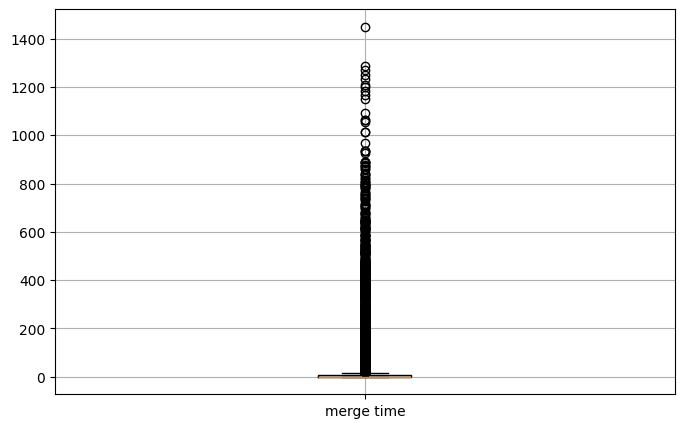

In [16]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.boxplot(merged_pulls_frame['merge_time'].to_numpy(), labels=['merge time'])
ax.grid()

# 3. Histogram thống kê thời gian được merged của pull requests

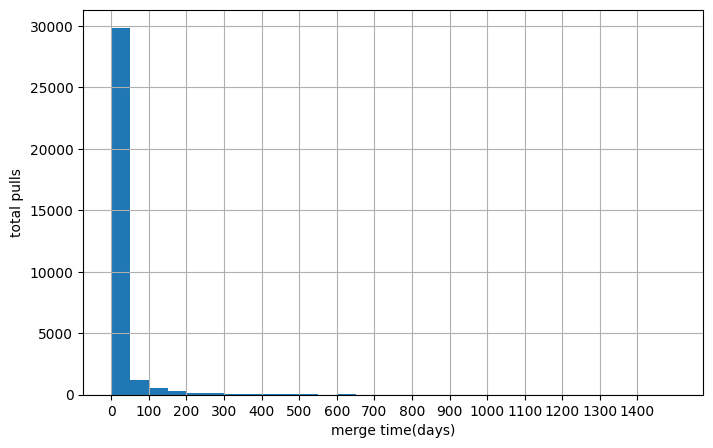

In [17]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.hist(merged_pulls_frame['merge_time'], bins= np.linspace(0, 1500, 31))
ax.set_xticks(np.linspace(0, 1400, 15))
ax.set_xlabel('merge time(days)')
ax.set_ylabel('total pulls')
ax.grid()

# 4. Scatter plot biểu diễn mối quan hệ giữa tổng số pull requests với số pull requests được merged của một người

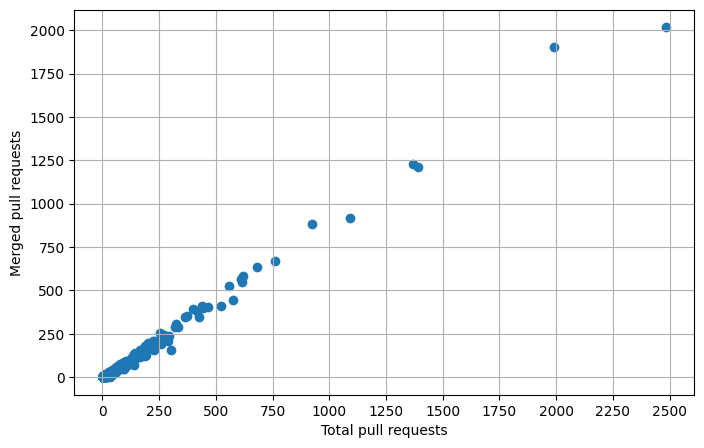

In [18]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.scatter(authors_frame['total pulls'].to_numpy(), authors_frame['merged pulls'])
ax.set_xlabel('Total pull requests')
ax.set_ylabel('Merged pull requests')
ax.set_xticks(np.linspace(0, 2500, 11))
ax.grid()

# 5. Bar plot biểu diễn số lượng pull requests và số pull requests được merged của 10 người nhiều pull requests nhất

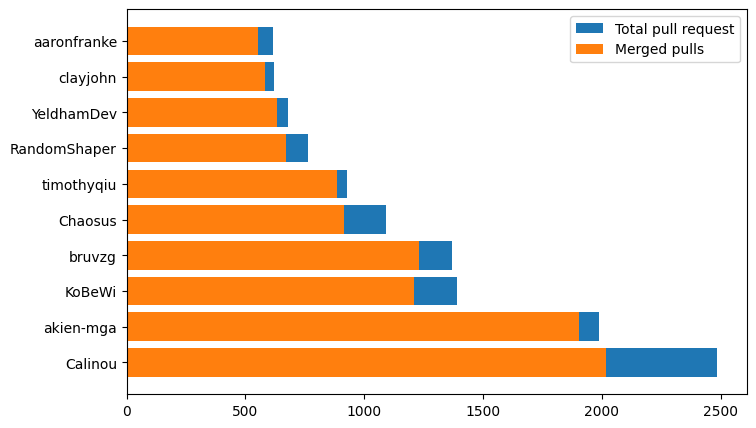

In [19]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.barh(authors_frame.iloc[:10].index, authors_frame['total pulls'].iloc[:10].to_numpy(), label= 'Total pull request')
ax.barh(authors_frame.iloc[:10].index, authors_frame['merged pulls'].iloc[:10].to_numpy(), label= 'Merged pulls')
ax.legend()

# 6. Box plot thống kê tỉ lệ được merged của pull requests

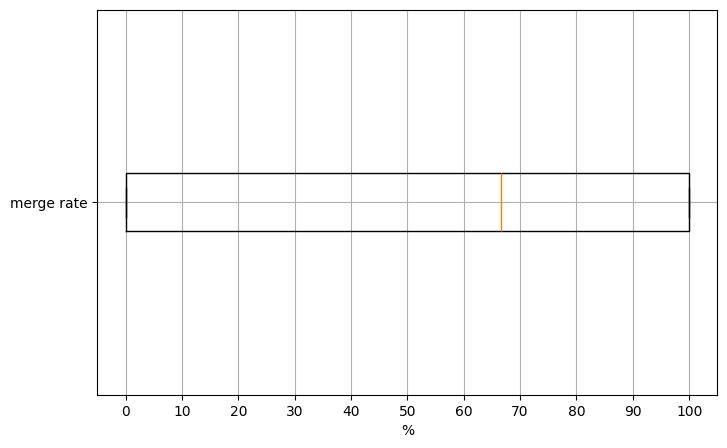

In [20]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.boxplot(authors_frame['merge rate(%)'], vert=False, labels=['merge rate'])
ax.set_xticks(np.linspace(0, 100, 11))
ax.set_xlabel('%')
ax.grid()

# 7. Thống kê về tổng số pull requests, số pull requests được merged và tỉ lệ được merged của những người tạo pull requests

In [21]:
authors_frame.describe()

,total pulls,merged pulls,merge rate(%)
count,3757.000000,3757.000000,3757.000000
mean,11.038062,8.675539,55.285368
std,76.762232,67.334192,42.435569
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,1.000000,66.666667
75%,4.000000,2.000000,100.000000
max,2485.000000,2017.000000,100.000000


# 8. Box plot biểu diễn số lượng pull requests được gắn của 10 nhãn nổi bật nhất

Text(0.5, 1.0, 'Top 10 most tagged label in pull requests')

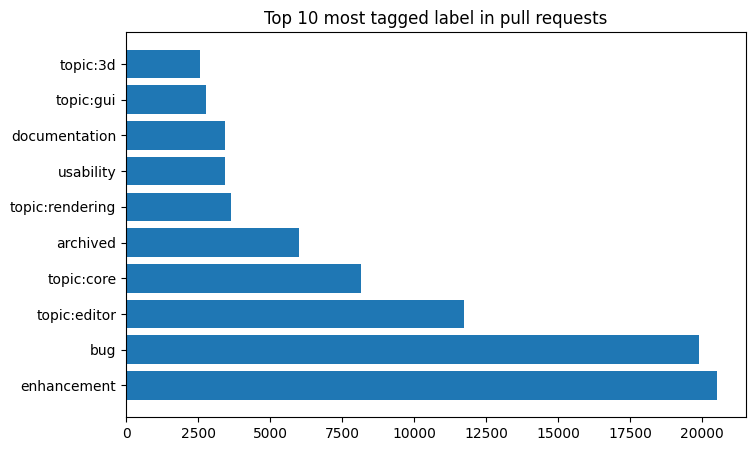

In [22]:
labels = np.array(sorted_pulls_labels)
fig, ax = plt.subplots(figsize= (8, 5))
ax.barh(labels[:10, 0], labels[:10, 1].astype('int32'))
ax.set_title('Top 10 most tagged label in pull requests')

# 9. Pie chart biểu diễn phần trăm pull requests được merged

Text(0.5, 1.0, 'Distribution of pull requests state')

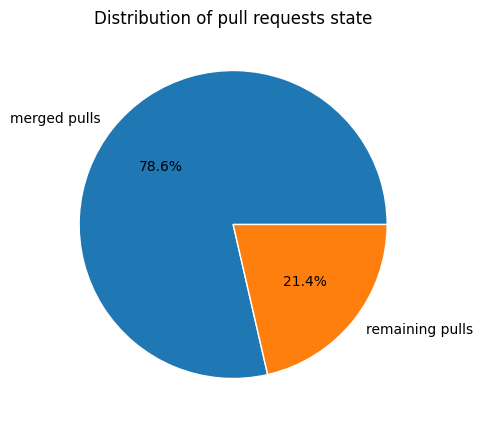

In [23]:
fig, ax = plt.subplots(figsize= (8, 5))
dict = {
    'merged pulls': len(merged_pulls_frame),
    'remaining pulls': len(pulls_frame) - len(merged_pulls_frame)
}
ax.pie(dict.values(), labels= dict.keys(),
       autopct= lambda pct : "{:.1f}%".format(pct),
       wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
       )
ax.set_title('Distribution of pull requests state')

# 10. Pie chart biểu diễn phần trăm những pull requests đạt checks

Text(0.5, 1.0, 'Distribution of pull requests check results')

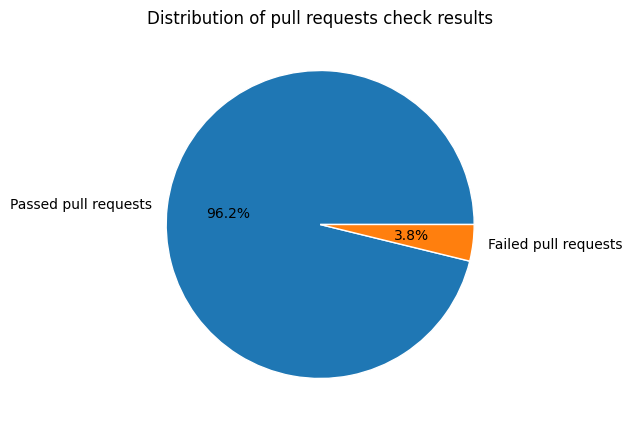

In [24]:
fig, ax = plt.subplots(figsize= (8, 5))
ax.pie([passed_pulls, failed_pulls], labels= ['Passed pull requests', 'Failed pull requests'],
       autopct= lambda pct : '{:.1f}%'.format(pct),
       wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
       )
ax.set_title('Distribution of pull requests check results')

# 11. Biểu đồ biểu diễn số lượng pull requests được tạo ra qua từng năm

Text(0.5, 1.0, 'Pull requests created each year')

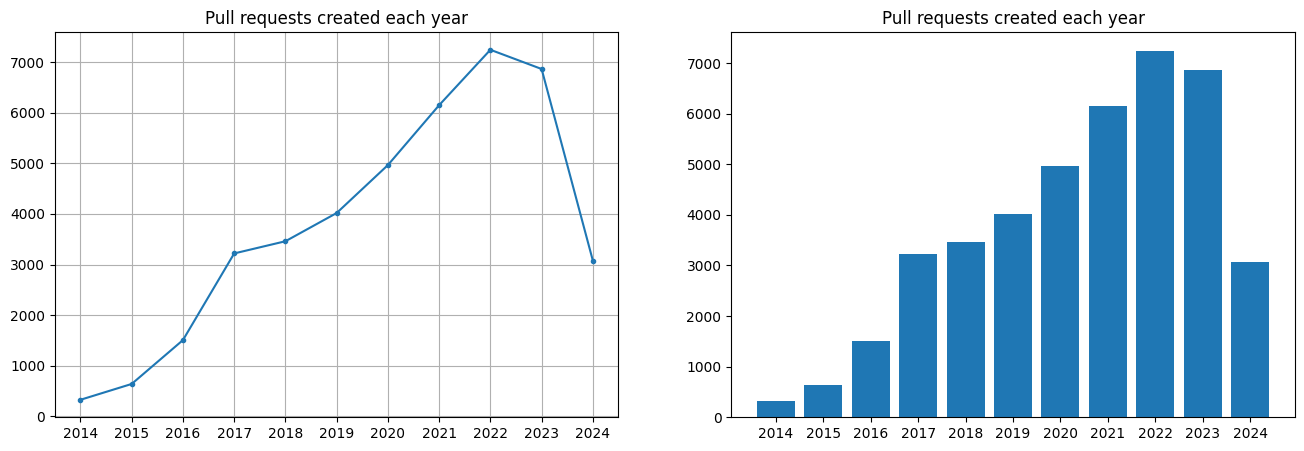

In [25]:
fig, ax = plt.subplots(1, 2, figsize= (16, 5))
ax[0].plot(pulls_each_year_frame, marker= '.')
ax[0].set_xticks(np.arange(2014, 2025))
ax[0].grid()
ax[0].set_title('Pull requests created each year')
ax[1].bar(pulls_each_year_frame.index.to_numpy(), pulls_each_year_frame['pull requests'].to_numpy())
ax[1].set_xticks(np.arange(2014, 2025))
ax[1].set_title('Pull requests created each year')